In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

In [2]:
def file_load(ticker):
    file = f'/Users/brendan/Desktop/Python/BoostedAI/quarterly_data/{ticker}.csv'
    df = pd.read_csv(file)
    df = df.rename({'Unnamed: 0':'Date'}, axis=1)
    return df

In [6]:
def common_size(ticker):
    df = file_load(ticker)
    df['Gross Margin %'] = df['Gross Profit']/df['Revenue'] * 100
    df['R&D % Rev'] = df['R&D Expenses']/df['Revenue'] * 100
    df['Op Expenses % Rev'] = df['Op Expenses'] / df['Revenue'] * 100
    df['EBIT Margin %'] = df['Op Income'] / df['Revenue'] * 100
    df['Net Margin %'] = df['Net Income'] / df['Revenue'] * 100
    df['OCF Margin %'] = df['cash_flow Operations'] / df['Revenue'] * 100
    df['FCF Margin %'] = df['Fcash_flow']/df['Revenue'] * 100
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    return df[['Date','Calendar_Year', 'Quarter', 'Mkt Cap','Revenue','Gross Margin %',
              'R&D % Rev', 'Op Expenses % Rev', 'EBIT Margin %','Net Margin %',
              'OCF Margin %','FCF Margin %']]

In [10]:
def common_size_growth(ticker):
    df = file_load(ticker)
    df = common_size(ticker)
    df['Rev % YoY'] = ((-df.groupby('Quarter')[['Revenue']].diff()['Revenue']).shift(-4).fillna(0))/df['Revenue']*100
    df['GM % bps YoY'] = ((-df.groupby('Quarter')[['Gross Margin %']].diff()['Gross Margin %']).shift(-4).fillna(0))*100
    df['EBIT % bps YoY'] = ((-df.groupby('Quarter')[['EBIT Margin %']].diff()['EBIT Margin %']).shift(-4).fillna(0))*100
    df['Net Margin % bps YoY'] = ((-df.groupby('Quarter')[['Net Margin %']].diff()['Net Margin %']).shift(-4).fillna(0))*100
    return df

In [16]:
def common_size_plot(ticker):
    df = common_size_growth(ticker)
    df_plot = df[['Date', 'Calendar_Year', 'Quarter','Rev % YoY','GM % bps YoY','EBIT % bps YoY']].set_index(['Date'])
    df_plot = df_plot[::-1]
    df_plot = df_plot[4:]
    df_plot  = df_plot.round({'Rev % YoY':0})
    return df_plot

In [32]:
def plot_initial(ticker):
    df = common_size_plot(ticker)
    fig, ax = plt.subplots()
    df.plot(kind='bar', y='Rev % YoY', figsize=(14,8), ax=ax)
    plt.title(label=f"{ticker} Revenue % YoY",
          fontsize=40,
          color="red",pad=3.0)
    ax.set_xticklabels([x.strftime("%m") for x in df.index], rotation=45)
    ax.tick_params(axis='x', which='major', labelsize=8)


    def add_value_label(x_list,y_list):
        for i in range(1, len(x_list)):
            plt.text(i,y_list[i],y_list[i], ha="center")

    x_list = list(df.index.values) 
    y_list = df['Rev % YoY']
        
    add_value_label(x_list, y_list)
    
    # 2011
    ax.axvline(x=5.25,ls='--',label='2012',color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value = 5
    ax.annotate(text='2012', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)

    # 2012
    ax.axvline(x=9.25,ls='--',label='2013',color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=9
    ax.annotate(text='2013', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)


    # 2013
    ax.axvline(x=13.25,ls='--',label='2014',color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=13
    ax.annotate(text='2014', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)

    # 2014
    ax.axvline(x=17.25,ls='--',label='2015',color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=17
    ax.annotate(text='2015', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)

    # 2015
    #
    ax.axvline(x=21.25,ls='--',label='2016', color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=21
    ax.annotate(text='2016', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)

    #2016

#
    ax.axvline(x=25.25,ls='--',label='2017',color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=25
    ax.annotate(text='2017', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)

    #2017
#
    ax.axvline(x=29.25,ls='--',label='2018',color='black',lw=1.25)
    x_bounds = ax.get_xlim()
    vline_value=29
    ax.annotate(text='2018', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)


    #2018
    #
    ax.axvline(x=33.25,ls='--',label='2019',color='black', lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=33
    ax.annotate(text='2019', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)

    #2019
    #
    ax.axvline(x=37.25,ls='--',label='2020',color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=37
    ax.annotate(text='2020', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)

    #2020
#
    ax.axvline(x=41.25,ls='--',label='2021',color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=41
    ax.annotate(text='2021', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)

#2021
#
    ax.axvline(x=45.25,ls='--',label='2022',color='black',lw=1.25) 
    x_bounds = ax.get_xlim()
    vline_value=45
    ax.annotate(text='2022', xy =(((vline_value-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='center', horizontalalignment='right' , rotation = 0)
    plt.show()

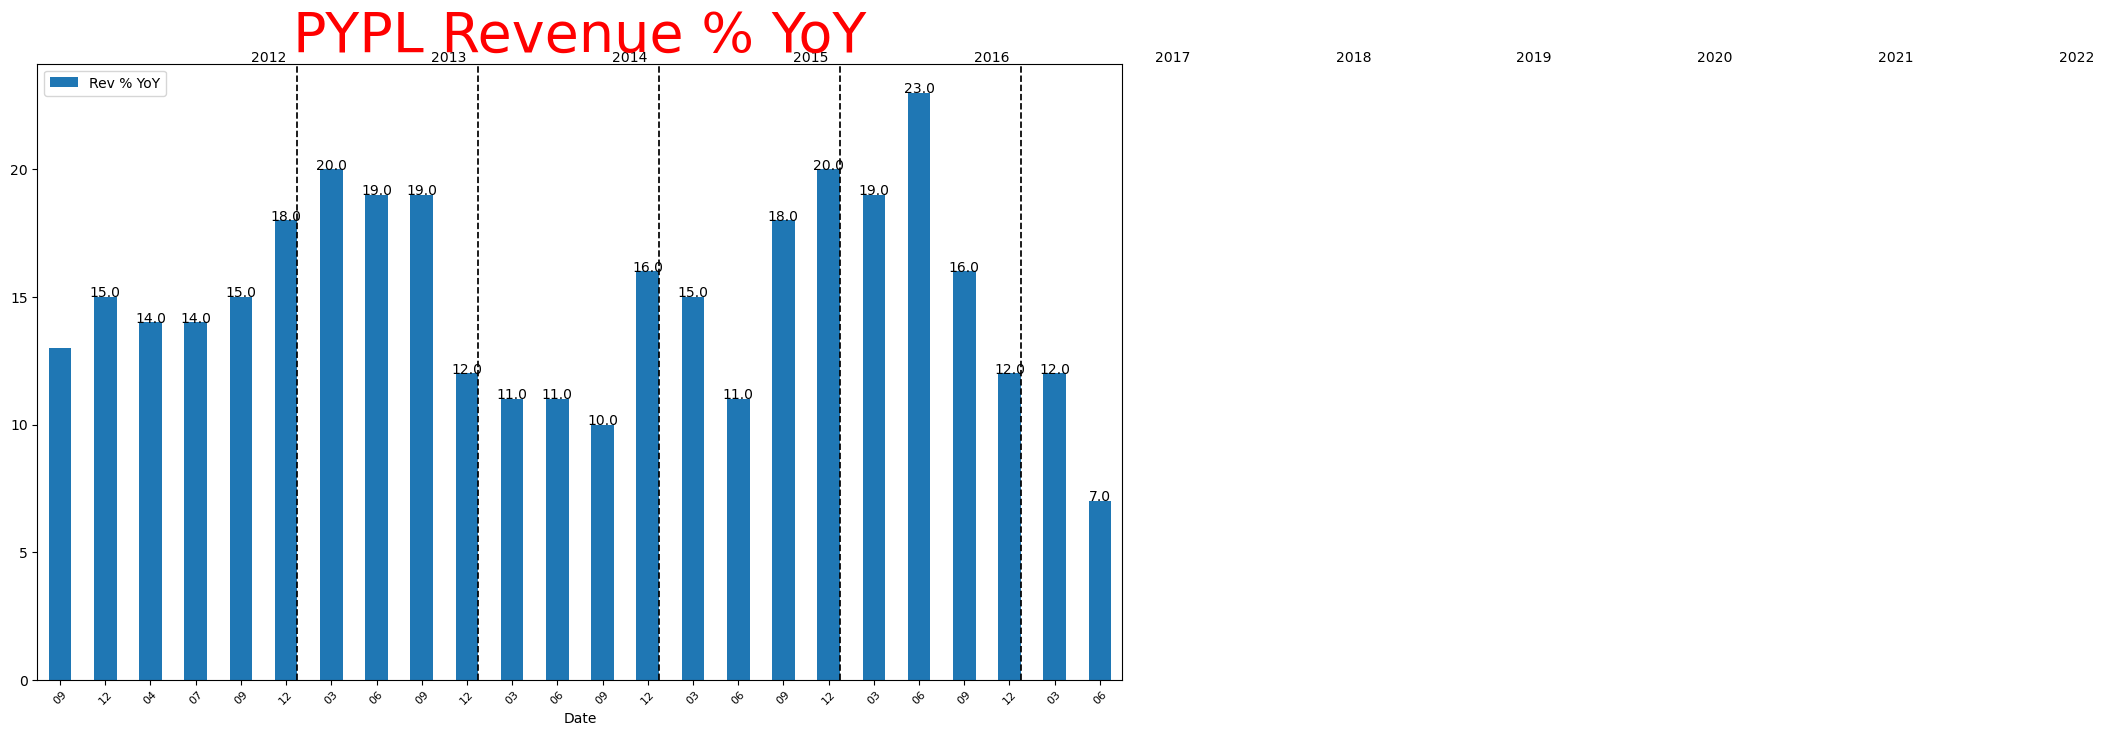

In [39]:
plot_initial('PYPL')